In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Problem1

## 1.1

In [63]:
%%html
<img src="Q1_1.jpg", width=500, heigth=300>

## 1.2 

In [64]:
%%html
<img src="Q1_2.jpg", width=500, heigth=300>

## 1.3

In [4]:
def ff_nn_ReLu(X, W, b, V, c, f_hidden, f_out):
    H = f_hidden(tf.tensordot(X, W, axes = 1) + b)
    out = f_out(tf.tensordot(H, V, axes = 1) + c)
    return out

## 1.4

In [7]:
W = tf.constant([[1, -1, 0, 1], [0, 0, 0.5, 1]], dtype = tf.float32) 
b = tf.constant([0, 0, 1, 0], dtype = tf.float32) 
V = tf.constant([1, 0, -1, 1], dtype = tf.float32) 
c = tf.constant([1], dtype = tf.float32) 
X = tf.constant([[1, -1], [0, -1], [0, 1]], dtype = tf.float32) 

y_hat = ff_nn_ReLu(X, W, b, V, c, tf.nn.relu, tf.nn.sigmoid)
print(y_hat.numpy().squeeze())

[0.81757444 0.6224593  0.6224593 ]


## Problem 2

## 2.1

In [65]:
%%html
<img src="Q2.jpg", width=500, heigth=300>

## 2.2 

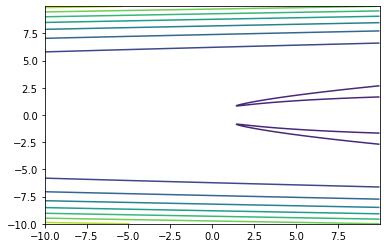

In [8]:
delta = 0.01
y = np.arange(-10.0, 10.0, delta)
x = np.arange(-10.0, 10.0, delta)

X, Y = np.meshgrid(x, y)
Z = (3 - X**3) + 50 * (2 * Y**2 - X)**2

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

## 2.3

In [11]:
def grad_f(vector):
    x, y = vector
    df_dx = -3 * x**2 + x - 200 * y**2
    df_dy = 800 * y**3 - 400 * x * y 
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    
    if starting_point is None:
        point = np.random.uniform(-10, 10, size = 2)
    else:
        point = starting_point
        
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    
    return np.array(trajectory)

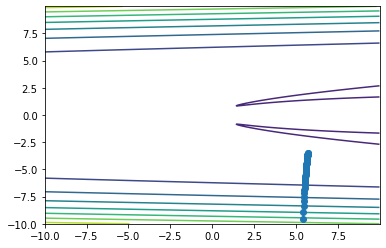

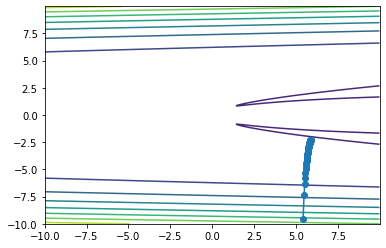

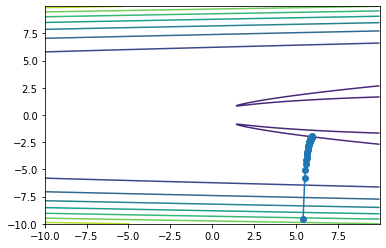

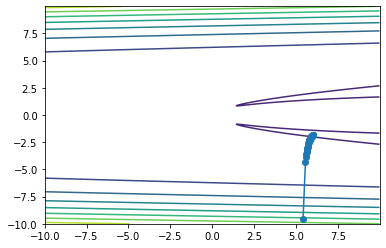

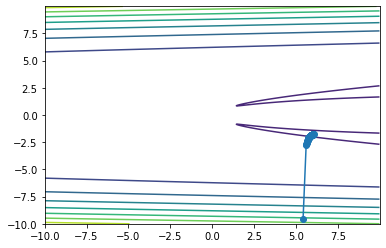

In [18]:
for i in np.linspace(0.000001, 0.00001, 5):
    np.random.seed(10)
    traj = grad_descent(iterations=50, learning_rate = i)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

## 2.4

In [26]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        starting_point = np.random.uniform(-5, 5,size=2)
    
    point = starting_point
    output = [point]
    v = np.array(point)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        output.append(point)
   
    return np.array(output)

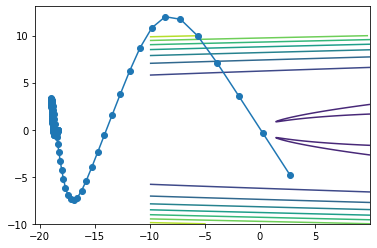

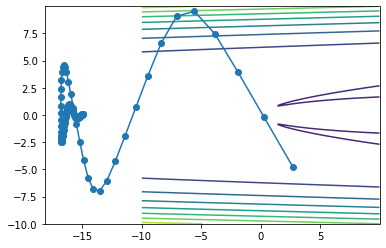

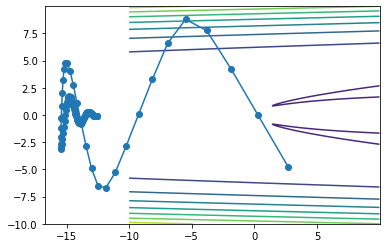

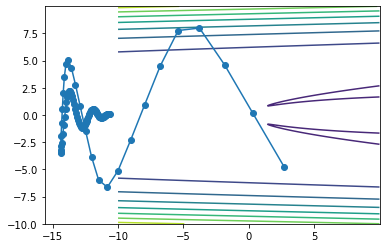

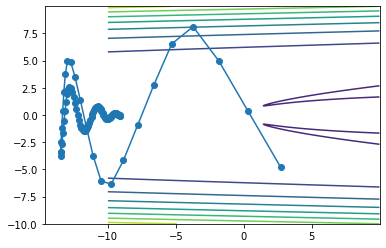

In [27]:
for i in np.linspace(0.000001, 0.00001, 5):
    np.random.seed(10)
    traj = grad_descent_with_momentum(iterations=100, alpha=.9, epsilon=i)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

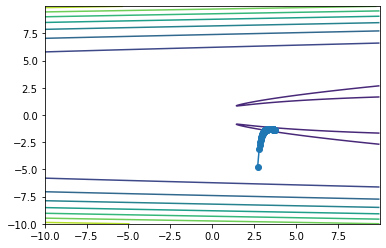

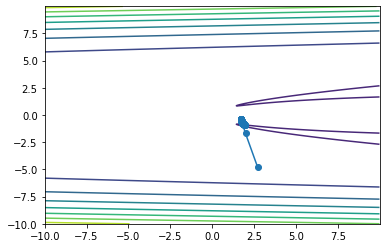

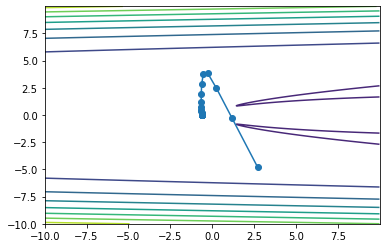

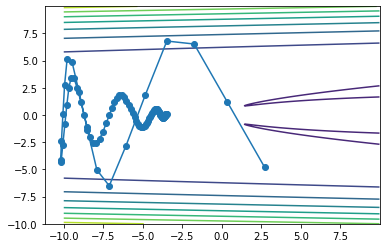

In [29]:
for i in np.linspace(0, 0.9, 4):
    np.random.seed(10)
    traj = grad_descent_with_momentum(iterations=100, alpha=i, epsilon = 0.00002)

    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

## Problem 3

## 3.1

In [67]:
%%html
<img src="Q3.jpg", width=800, heigth=400>

## 3.2

In [49]:
def loss(y, y_hat):
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [50]:
W = np.random.randn(8).reshape((4,2))
b = np.random.randn(4)
v = np.random.randn(4)
c = np.random.randn(1)

def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])
    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14,
                     dL_dw21, dL_dw22, dL_dw23, dL_dw24,
                     dL_db1, dL_db2, dL_db3, dL_db4,
                     dL_dv1, dL_dv2, dL_dv3, dL_dv4,
                     dL_dc])

## 3.3

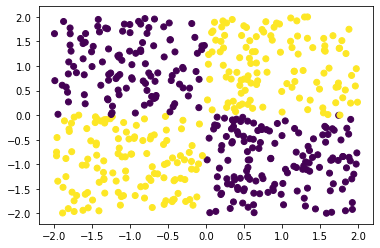

In [52]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y = np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

plt.scatter(x[:,0],x[:,1],c=y)

## 3.4

In [54]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float64")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

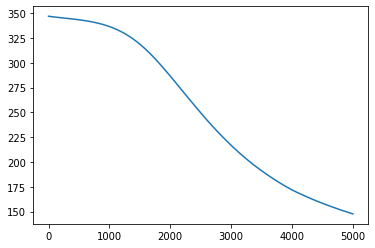

In [55]:
traj, losses = grad_descent(x, y, iterations=5000)
plt.plot(losses)

## 3.5

In [56]:
def grad_descent_momentum(x, y, iterations=5550, epsilon=10, alpha=.9):
    point = np.random.uniform(-.1,.1,size=17).astype("float64")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v - epsilon * grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

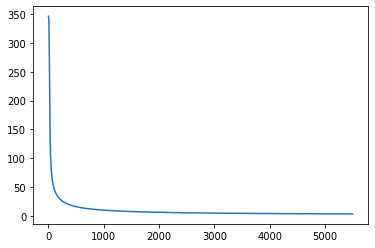

In [59]:
traj, losses = grad_descent_momentum(x, y, iterations=5500, epsilon=1, alpha=.5)
plt.plot(losses)

Yes, it converges more efficiently. <br>
When using the orginal gradient descent, it has a tendency to overstep in one direction and then it has to walk back down the hill in the next step. The oscillatory behavior is wasteful. And by using gradient descent with momentum, we can avoid this kind of oscillatory behavior, making it converge more efficiently.

## 3.6

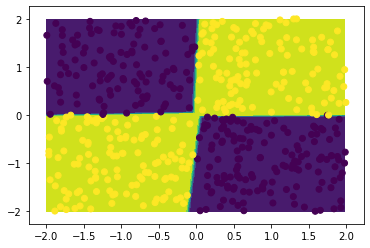

In [60]:
delta = 0.025
x1 = np.arange(-2.0, 2.0,  delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)